In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/chess/games.csv


In [0]:
#install external libs
!pip install seaborn

In [0]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
lichess_data = pd.read_csv('/kaggle/input/chess/games.csv') #give in an appropriate path depending on where your dataset is stored
lichess_data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [0]:
lichess_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
id                20058 non-null object
rated             20058 non-null bool
created_at        20058 non-null float64
last_move_at      20058 non-null float64
turns             20058 non-null int64
victory_status    20058 non-null object
winner            20058 non-null object
increment_code    20058 non-null object
white_id          20058 non-null object
white_rating      20058 non-null int64
black_id          20058 non-null object
black_rating      20058 non-null int64
moves             20058 non-null object
opening_eco       20058 non-null object
opening_name      20058 non-null object
opening_ply       20058 non-null int64
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [0]:
lichess_data.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

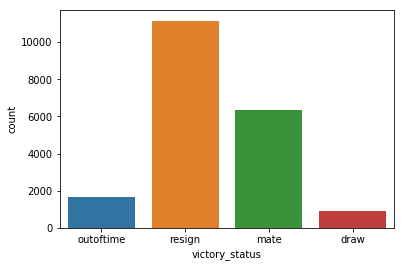

In [0]:
sns.countplot(x="victory_status",data=lichess_data)

***Inference drawn from Plot 1 (victory_status countplot)***
1. Matches are won by players mostly after **resignation** by the opponent, pointing to fair game play.
2. **Checkmates** are also not very uncommon, which means matches often reach a decisive conslusion.
3. **Timeouts** are less common, yet they tend to occur more in the smaller time format games as shall be seen.
4. **Draws** are rare  


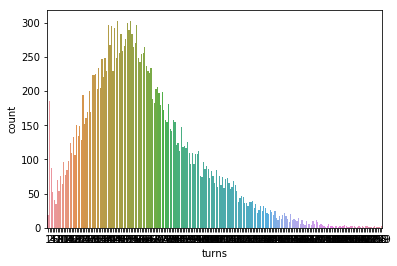

In [0]:
sns.countplot(x="turns",data=lichess_data)

***Inference drawn from Plot 2 (turn countplot)***
1. The curve obtained seems to closely resemble the Maxwell-Boltzman curve which gives the distribution of speeds of molecules in thermal equilibrium. 
2. The curve has a sharp climbing entry and peaks out at some value max prob **Pmax**, after which an initially steeper descent smoothens out to a gradual one. 
3. If the speed of the molecules is viewed in concurrence with the turns of a chess game, it becomes clear that games having lesser turns will be more likely to occur than games having higher number of turns. At a certain move number, the graph peaks out, and this could be considered as the most frequently occuring game. 


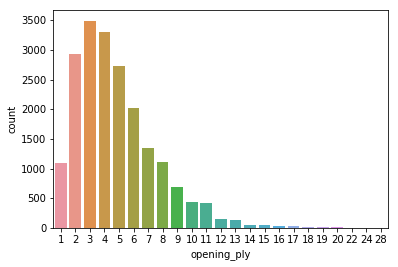

In [0]:
sns.countplot(x="opening_ply",data=lichess_data)

***Inference drawn from Plot 3 (opening_ply countplot)***
1. Opening_ply (or opening play) is the number of moves taken for a game to go from the opening phase to the middle game.
2. Being very game particular, it may or may not have a direct correlation with the player ratings,type of openings etc. 


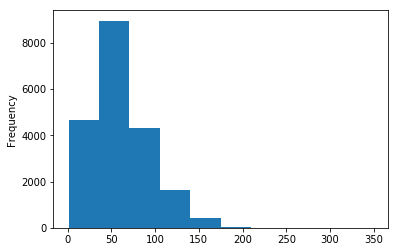

In [0]:
lichess_data["turns"].plot.hist()

***Inference drawn from Plot 4 (turns histogram)***
1. Histogram for the turns parameter

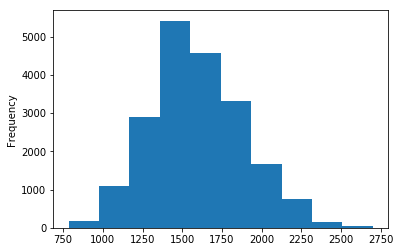

In [0]:
lichess_data["white_rating"].plot.hist()

***Inference drawn from Plot 5 (white_rating histogram)***
1. The graph obtained is roughly a bell curve, which makes sense as there are many good players as compared to newbies or chess masters. 

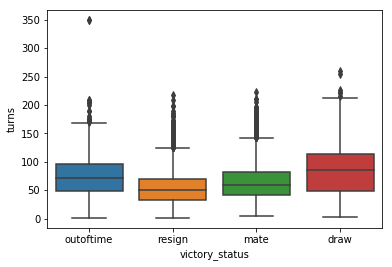

In [0]:
sns.boxplot(x="victory_status",y="turns",data=lichess_data)

***Inference drawn from Plot 6 (victory_status v/s turns boxplot)***
1. The draws that occure in chess are either by stalemate, or by 3 move repetition, or by exceeding a fixed set of moves. Long games tend to result in a draw if there's no significant material imbalance.
2. Resignations or mates occur around the 50th turn, which is the usual length of the game. 
3. Out of time or "flagging" victories are sought when the conclusion to the game isn't reached in the conventional manner and the player then proceeds to burn down on the opponents clock. This coud explain why the median for it is around the 75th turn.

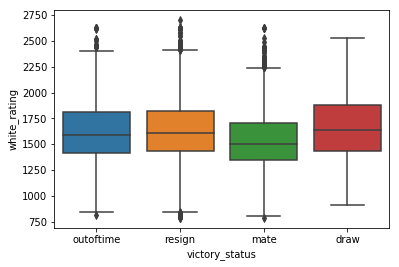

In [0]:
sns.boxplot(x="victory_status",y="white_rating",data=lichess_data)

***Inference drawn from Plot 7 (victory_status v/s white_rating boxplot)***
1. Based in this plot, it is fair to say that higher rated players playing white are most likely to respectfully resign or play out for a draw than to get mated themselves. 
2. Lower rated players are most likely to get mated themselves or run out of time. 

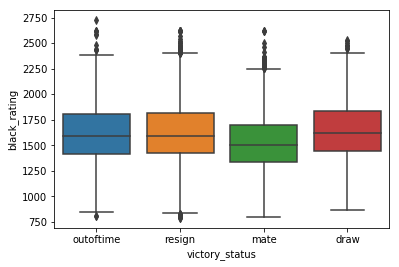

In [0]:
sns.boxplot(x="victory_status",y="black_rating",data=lichess_data)

***Inference drawn from Plot 8 (victory_status v/s black_rating boxplot)***
1. Based in this plot, it is fair to say that higher rated players playing black are equally likely to respectfully resign or play out for a draw or to run out of time themselves.
2. Lower rated players are most likely to get mated themselves.
3. A draw with the black pieces in the classical time formats of this game is considered as a decent outcome.

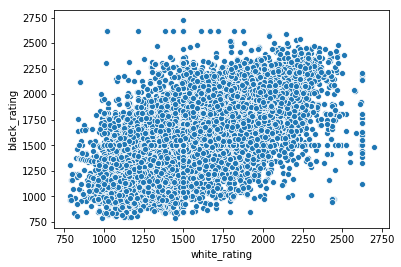

In [0]:
sns.scatterplot(x="white_rating",y="black_rating",data=lichess_data)

***Inference drawn from Plot 8 (white_rating v/s black_rating scatterplot)***
1. A random plot scattering shows that the edge cases are very blatantly missing, ie. a 750 rated player playing white has never played with a 2750 rated player playing black.
2. The above fact gives away the pairing mechanism of Lichess, which is to pair you up with a player having roughly the same rating as you.
3. Some outliers here would arise because of players participating in tournaments, where the pairing could be on an entirely random basis.

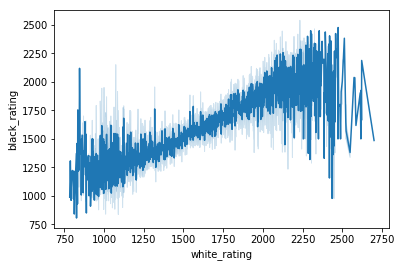

In [0]:
sns.lineplot(x="white_rating",y="black_rating",data=lichess_data)

***Inference drawn from Plot 9 (white_rating v/s black_rating lineplot)***
1. Based on this plot, it wouldn't be wrong to claim that a player would want to play another player having the same rating, ie. the same calibre as themselves. This is also how Lichess's pool rating matching algorithm works. 
2. Also, since several matches are played between a set of 2 people, and they switch sides every game, a spike in the downward direction in the graph would be immediately countered by another spike in the upward direction. 

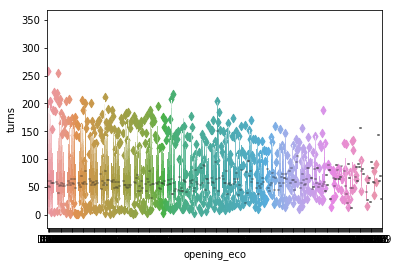

In [0]:
sns.boxenplot(x="opening_eco", y="turns",
              scale="linear", data=lichess_data)

***Inference drawn from Plot 10 (opening_eco v/s turns boxenplot)***
1. The number of turns seem to taper down as we move across the opening_eco order. 
2. Openings get rarer and unstable moving across the X axis, and that is also why most players don't play them.

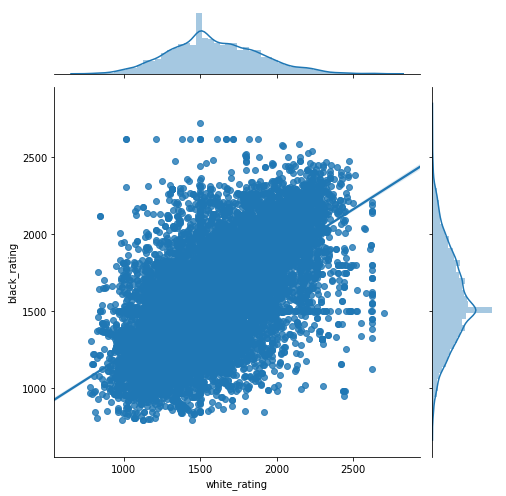

In [0]:
sns.jointplot("white_rating", "black_rating", kind='reg',data=lichess_data,
                  height=7)

***Inference drawn from Plot 11 (white_rating v/s black_rating jointplot)***
1. This plot gives us all information to draw some useful conslusions.
2. The white_rating plot is a flattened bayesian, and so is the black_rating one.
3. The thumbpinpoint plot gives us a scatter plot like appearance, however, a regression line is plotted giving us a rough estimate of how the data is modelled.
4. An x=y or x-y=0 (roughly) line is found to be the regression line generalizing & encapsulating all the data points in this space, pointing the same previously stated fact that a player would want to play another player of the same rating, or a rating which lies in the same ballpark. 